# Attributes Selection

In [ ]:
from google.colab import files
files.upload()

In [2]:
import pandas as pd
census = pd.read_csv('census.csv')
census.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
import numpy as np
np.unique(census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

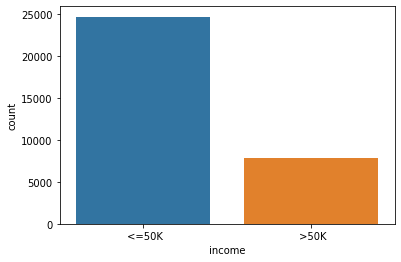

In [4]:
import seaborn as sns
sns.countplot(x = census['income']);

In [5]:
X_census = census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [6]:
y_census = census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

columns = [1,3,5,6,7,8,9,13]
for c in columns:
  encoder = LabelEncoder()
  X_census[:,c] = encoder.fit_transform(X_census[:,c])

In [8]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [9]:
len(X_census), len(y_census)

(32561, 32561)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_census_scaler = scaler.fit_transform(X_census)
X_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

# Low Variance

In [13]:
X_census.shape[1]

14

In [14]:
import numpy as np
np.sqrt(X_census[:,0].var()), X_census_scaler[:,0].var()

(13.640223092304081, 0.034913808595952486)

In [15]:
for i in range(X_census.shape[1]):
  print(X_census_scaler[:,i].var())

0.034913808595952486
0.03312115190663569
0.005138537590667898
0.06657103564450892
0.029416385024073417
0.06301761677301636
0.09123816653931152
0.10326534394406342
0.04502805169292987
0.22136950173699113
0.00545419549240862
0.008557270623428908
0.015874043397822807
0.03641266114220053


In [16]:
# salário - renda = parecidos
# idade - gênero = diferentes
from sklearn.feature_selection import VarianceThreshold

In [18]:
selection = VarianceThreshold(threshold=0.05)
X_census_variance = selection.fit_transform(X_census_scaler)
X_census_variance.shape

(32561, 5)

In [19]:
X_census_variance

array([[0.6       , 0.66666667, 0.07142857, 0.2       , 1.        ],
       [0.6       , 0.33333333, 0.28571429, 0.        , 1.        ],
       [0.73333333, 0.        , 0.42857143, 0.2       , 1.        ],
       ...,
       [0.73333333, 1.        , 0.07142857, 0.8       , 0.        ],
       [0.73333333, 0.66666667, 0.07142857, 0.6       , 1.        ],
       [0.73333333, 0.33333333, 0.28571429, 1.        , 0.        ]])

In [20]:
selection.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

In [21]:
indexs = np.where(selection.variances_ > 0.05)
indexs

(array([3, 5, 6, 7, 9]),)

In [23]:
census_variance = census.drop(columns = ['age', 'workclass', 'final-weight',
                                         'education-num', 'race', 'capital-gain',
                                         'capital-loos', 'hour-per-week', 
                                         'native-country'], axis = 1)
census_variance

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K
...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,Male,<=50K


In [24]:
X_census_variance = census_variance.iloc[:,0:5].values
y_census_variance = census_variance.iloc[:,5].values

In [25]:
X_census_variance

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' Female']], dtype=object)

In [26]:
y_census_variance

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [28]:
columns = [0,1,2,3,4]
for c in columns:
  encoder = LabelEncoder()
  X_census_variance[:,c] = encoder.fit_transform(X_census_variance[:,c])

In [29]:
X_census_variance

array([[9, 4, 1, 1, 1],
       [9, 2, 4, 0, 1],
       [11, 0, 6, 1, 1],
       ...,
       [11, 6, 1, 4, 0],
       [11, 4, 1, 3, 1],
       [11, 2, 4, 5, 0]], dtype=object)

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3,4])],remainder='passthrough')
X_census_variance = onehotencorder.fit_transform(X_census_variance).toarray()
X_census_variance

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [31]:
scaler = MinMaxScaler()
X_census_variance = scaler.fit_transform(X_census_variance)
X_census_variance

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [32]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_census_variance, y_census_variance, test_size=0.15, random_state=0)
X_tr.shape, X_ts.shape

((27676, 46), (4885, 46))

In [34]:
# 84.70
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
predict = random_forest.predict(X_ts)
accuracy_score(y_ts, predict)

0.8182190378710338

# Extra Tree

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
X_census_scaler.shape

(32561, 14)

In [40]:
selection = ExtraTreesClassifier()
selection.fit(X_census_scaler, y_census)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [41]:
importances = selecao.feature_importances_
importances

array([0.15328118, 0.04503294, 0.16460261, 0.03492347, 0.09112235,
       0.07569368, 0.07569205, 0.08915483, 0.01450404, 0.02898983,
       0.08729624, 0.02823648, 0.09362986, 0.01784044])

In [42]:
importances.sum()

1.0

In [43]:
indexs = []
for i in range(len(importances)):
  if importances[i] >= 0.029:
    indexs.append(i)

In [44]:
indexs

[0, 1, 2, 3, 4, 5, 6, 7, 10, 12]

In [45]:
X_census_extra = X_census[:, indexs]
X_census_extra

array([[39, 7, 77516, ..., 1, 2174, 40],
       [50, 6, 83311, ..., 0, 0, 13],
       [38, 4, 215646, ..., 1, 0, 40],
       ...,
       [58, 4, 151910, ..., 4, 0, 40],
       [22, 4, 201490, ..., 3, 0, 20],
       [52, 5, 287927, ..., 5, 15024, 40]], dtype=object)

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7])],remainder='passthrough')
X_census_extra = onehotencorder.fit_transform(X_census_extra).toarray()
X_census_extra

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3000e+01, 2.1740e+03,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3000e+01, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 1.5024e+04,
        4.0000e+01]])

In [47]:
X_census_extra.shape

(32561, 58)

In [48]:
from sklearn.model_selection import train_test_split
X_tr_extra, X_ts_extra, y_tr_extra, y_ts_extra = train_test_split(X_census_extra, y_census_variance, test_size=0.15, random_state=0)
X_tr_extra.shape, X_ts_extra.shape

((27676, 58), (4885, 58))

In [49]:
from sklearn.ensemble import RandomForestClassifier
random_forest_extra = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_extra.fit(X_ts_extra, y_ts_extra)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# 0.8470
from sklearn.metrics import accuracy_score, classification_report
predict = random_forest_extra.predict(X_ts_extra)
accuracy_score(y_ts_extra, predict)

0.9705220061412487